# ЭТАП 1: Exploratory Data Analysis (Продолжение)

**Цель**: Анализ категориальных признаков - артистов и жанров, их влияние на популярность треков.

---


# Импорт библиотек


In [1]:
# Основные библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print("Библиотеки импортированы успешно!")


Библиотеки импортированы успешно!


# Загрузка и проверка Датасета


In [4]:
# Загрузка датасета
df = pd.read_csv('/content/dataset.csv', index_col=0)

print(f"Загружено записей: {len(df)}")
print(f"Количество колонок: {len(df.columns)}")
print(f"Размер в памяти: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Вывод первых 5 записей
df.head(5)


Загружено записей: 114000
Количество колонок: 20
Размер в памяти: 49.66 MB


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


---
# ЗАДАЧА 3: Анализ категориальных признаков

## Цель
Выявление наиболее популярных категорий артистов и жанров, анализ их влияния на популярность треков.

## План действий

### 1. Частотный анализ артистов и жанров
- Проанализировать распределение треков по артистам
- Проанализировать распределение треков по жанрам  
- Выявить самых продуктивных артистов

### 2. Визуализация топ-N категорий
- Построить барплоты для топ артистов по количеству треков
- Визуализировать топ жанров по количеству треков
- Создать графики средней популярности по категориям

### 3. Анализ влияния категорий на популярность
- Исследовать зависимость популярности от артиста
- Исследовать зависимость популярности от жанра
- Выявить наиболее популярные категории


## 1. Частотный анализ артистов и жанров


In [5]:
# Анализ распределения треков по жанрам
print("="*60)
print("АНАЛИЗ ЖАНРОВ")
print("="*60)
print(f"Всего уникальных жанров: {df['track_genre'].nunique()}")
print(f"\nРаспределение треков по жанрам:")
genre_counts = df['track_genre'].value_counts()
print(genre_counts.head(20))
print(f"\nСреднее количество треков на жанр: {genre_counts.mean():.1f}")
print(f"Медиана: {genre_counts.median():.1f}")
print(f"Максимум: {genre_counts.max()}")
print(f"Минимум: {genre_counts.min()}")


АНАЛИЗ ЖАНРОВ
Всего уникальных жанров: 114

Распределение треков по жанрам:
track_genre
acoustic         1000
afrobeat         1000
alt-rock         1000
alternative      1000
ambient          1000
anime            1000
black-metal      1000
bluegrass        1000
blues            1000
brazil           1000
breakbeat        1000
british          1000
cantopop         1000
chicago-house    1000
children         1000
chill            1000
classical        1000
club             1000
comedy           1000
country          1000
Name: count, dtype: int64

Среднее количество треков на жанр: 1000.0
Медиана: 1000.0
Максимум: 1000
Минимум: 1000


In [6]:
# Анализ распределения треков по артистам
# Обработка колонки artists (может содержать несколько артистов через ';')
print("="*60)
print("АНАЛИЗ АРТИСТОВ")
print("="*60)

# Разделяем артистов, если их несколько в одной записи
all_artists = []
for artists_str in df['artists'].dropna():
    if ';' in str(artists_str):
        # Если несколько артистов, разделяем их
        artists_list = [a.strip() for a in str(artists_str).split(';')]
        all_artists.extend(artists_list)
    else:
        all_artists.append(str(artists_str).strip())

# Подсчет частоты каждого артиста
artist_counts = pd.Series(all_artists).value_counts()

print(f"Всего уникальных артистов: {len(artist_counts)}")
print(f"\nТоп-20 самых продуктивных артистов:")
print(artist_counts.head(20))
print(f"\nСреднее количество треков на артиста: {artist_counts.mean():.2f}")
print(f"Медиана: {artist_counts.median():.1f}")
print(f"Максимум: {artist_counts.max()}")
print(f"Минимум: {artist_counts.min()}")


АНАЛИЗ АРТИСТОВ
Всего уникальных артистов: 29858

Топ-20 самых продуктивных артистов:
J Balvin                   510
Bad Bunny                  416
Daddy Yankee               375
Wolfgang Amadeus Mozart    354
Feid                       348
George Jones               343
Pritam                     333
Arijit Singh               305
ILLENIUM                   298
The Beatles                280
Jhayco                     269
Ella Fitzgerald            263
Linkin Park                253
David Guetta               250
Hank Williams              248
Stevie Wonder              239
Don Omar                   234
Yuvan Shankar Raja         233
Prateek Kuhad              230
KAROL G                    228
Name: count, dtype: int64

Среднее количество треков на артиста: 5.30
Медиана: 2.0
Максимум: 510
Минимум: 1


## 2. Визуализация топ-N категорий


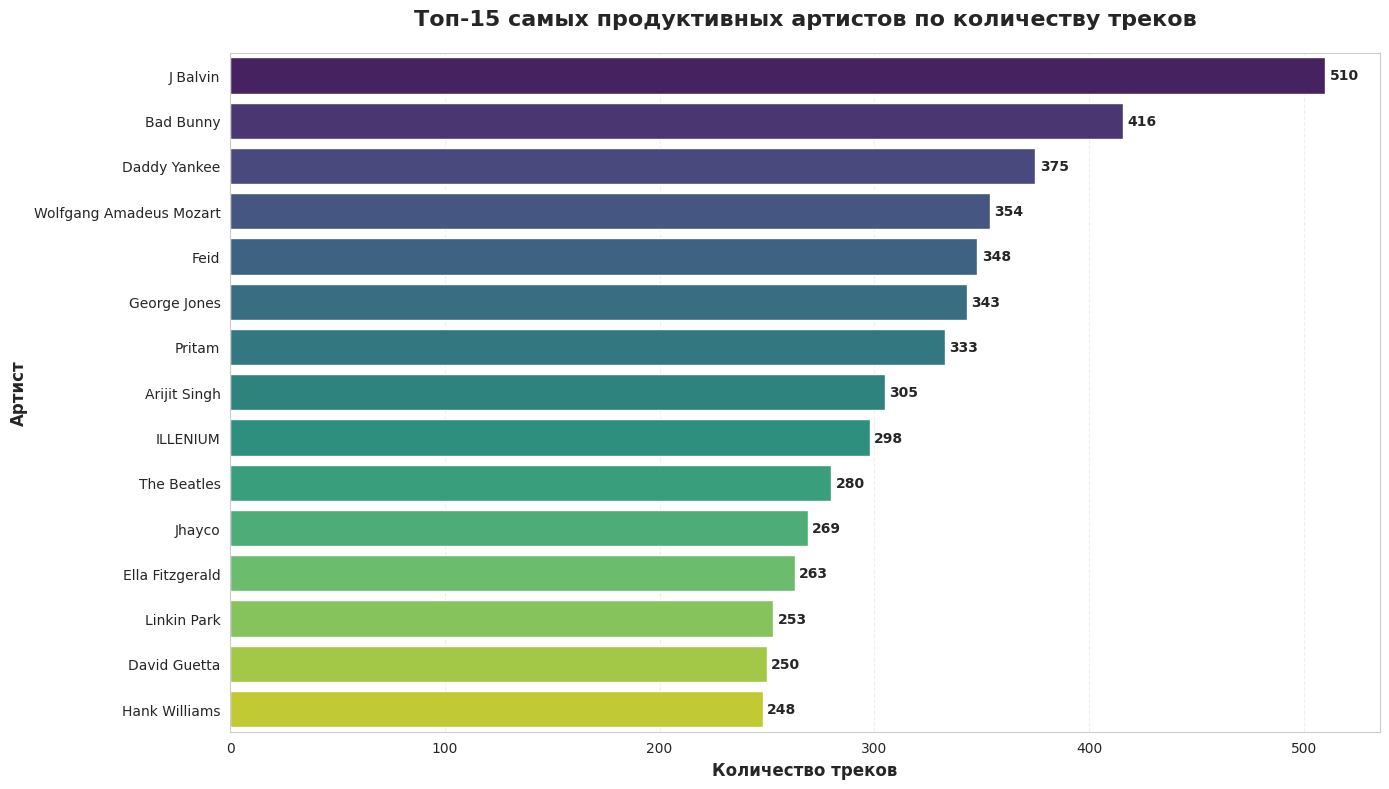

In [7]:
# Визуализация топ-15 артистов по количеству треков
sns.set_style("whitegrid")

top_artists = artist_counts.head(15)

plt.figure(figsize=(14, 8))
sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis')

# Добавляем числа на каждый столбец
for i, count in enumerate(top_artists.values):
    plt.text(count + 2, i, f'{count:,}', va='center', fontweight='bold', fontsize=10)

plt.xlabel('Количество треков', fontsize=12, fontweight='bold')
plt.ylabel('Артист', fontsize=12, fontweight='bold')
plt.title('Топ-15 самых продуктивных артистов по количеству треков',
          fontsize=16, fontweight='bold', pad=20)
plt.grid(True, alpha=0.3, linestyle='--', axis='x')
plt.tight_layout()
plt.show()


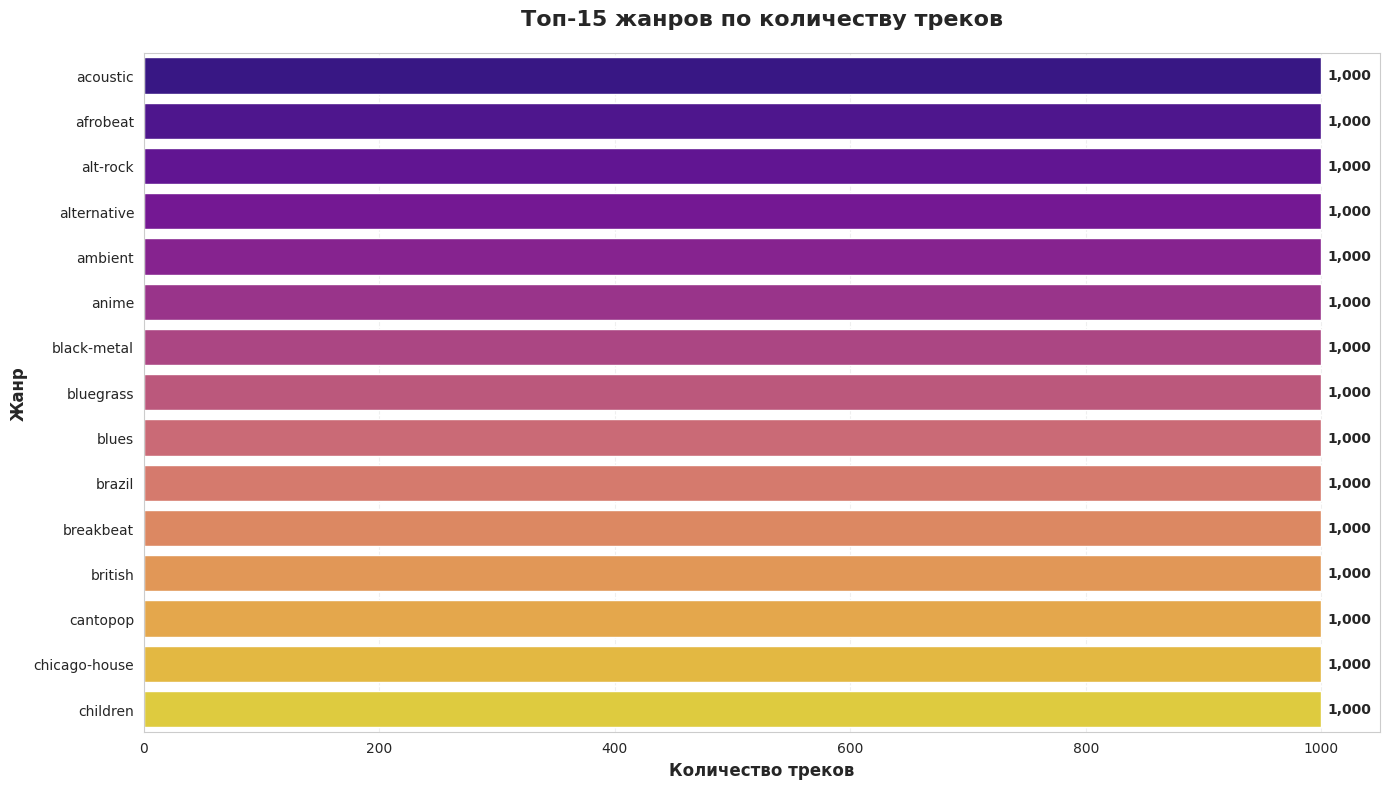

In [8]:
# Визуализация топ-15 жанров по количеству треков
plt.figure(figsize=(14, 8))

top_genres = genre_counts.head(15)

sns.barplot(x=top_genres.values, y=top_genres.index, palette='plasma')

# Добавляем числа на каждый столбец
for i, count in enumerate(top_genres.values):
    plt.text(count + 5, i, f'{count:,}', va='center', fontweight='bold', fontsize=10)

plt.xlabel('Количество треков', fontsize=12, fontweight='bold')
plt.ylabel('Жанр', fontsize=12, fontweight='bold')
plt.title('Топ-15 жанров по количеству треков',
          fontsize=16, fontweight='bold', pad=20)
plt.grid(True, alpha=0.3, linestyle='--', axis='x')
plt.tight_layout()
plt.show()


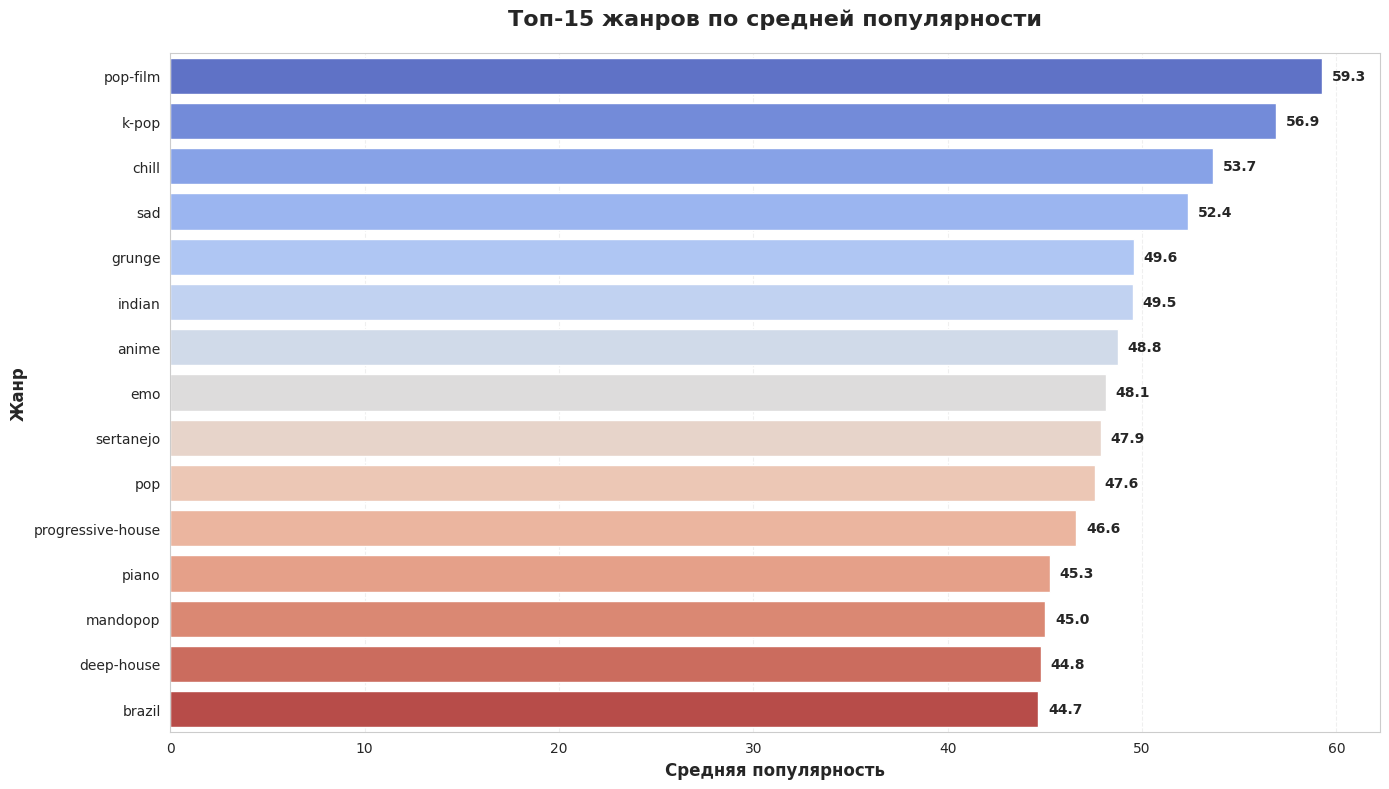

In [9]:
# Визуализация средней популярности по жанрам (топ-15)
genre_popularity = df.groupby('track_genre')['popularity'].mean().sort_values(ascending=False)

plt.figure(figsize=(14, 8))

top_genres_pop = genre_popularity.head(15)

sns.barplot(x=top_genres_pop.values, y=top_genres_pop.index, palette='coolwarm')

# Добавляем числа на каждый столбец
for i, value in enumerate(top_genres_pop.values):
    plt.text(value + 0.5, i, f'{value:.1f}', va='center', fontweight='bold', fontsize=10)

plt.xlabel('Средняя популярность', fontsize=12, fontweight='bold')
plt.ylabel('Жанр', fontsize=12, fontweight='bold')
plt.title('Топ-15 жанров по средней популярности',
          fontsize=16, fontweight='bold', pad=20)
plt.grid(True, alpha=0.3, linestyle='--', axis='x')
plt.tight_layout()
plt.show()


## 3. Анализ влияния категорий на популярность


In [10]:
# Анализ зависимости популярности от артиста
# Для каждого артиста вычисляем среднюю популярность его треков
print("="*60)
print("АНАЛИЗ ВЛИЯНИЯ АРТИСТА НА ПОПУЛЯРНОСТЬ")
print("="*60)

# Создаем расширенный датафрейм с отдельными строками для каждого артиста
expanded_artists = []
for idx, row in df.iterrows():
    artists_str = str(row['artists'])
    if pd.notna(row['artists']):
        if ';' in artists_str:
            artists_list = [a.strip() for a in artists_str.split(';')]
            for artist in artists_list:
                expanded_artists.append({
                    'artist': artist,
                    'popularity': row['popularity']
                })
        else:
            expanded_artists.append({
                'artist': artists_str.strip(),
                'popularity': row['popularity']
            })

artists_df = pd.DataFrame(expanded_artists)

# Группируем по артистам и считаем среднюю популярность
artist_popularity = artists_df.groupby('artist').agg({
    'popularity': ['mean', 'count']
}).reset_index()
artist_popularity.columns = ['artist', 'avg_popularity', 'track_count']

# Фильтруем артистов с минимум 5 треками для более репрезентативной статистики
artist_popularity_filtered = artist_popularity[artist_popularity['track_count'] >= 5].sort_values('avg_popularity', ascending=False)

print(f"\nТоп-20 артистов по средней популярности (минимум 5 треков):")
print(artist_popularity_filtered.head(20).to_string(index=False))


АНАЛИЗ ВЛИЯНИЯ АРТИСТА НА ПОПУЛЯРНОСТЬ

Топ-20 артистов по средней популярности (минимум 5 треков):
                  artist  avg_popularity  track_count
          Olivia Rodrigo       87.400000            5
                Måneskin       83.666667           12
               Lil Nas X       83.454545           11
           One Direction       83.000000            5
                 TV Girl       82.000000            5
           Bomba Estéreo       81.500000            6
                    Mora       79.714286            7
             Beach Bunny       79.428571            7
                  Mitski       78.888889            9
             Jhay Cortez       78.714286            7
                   Shubh       77.800000            5
Rage Against The Machine       77.285714            7
                 ROSALÍA       77.090909           11
               Radiohead       76.650000           20
           WALK THE MOON       76.600000            5
                  Regard       76.10

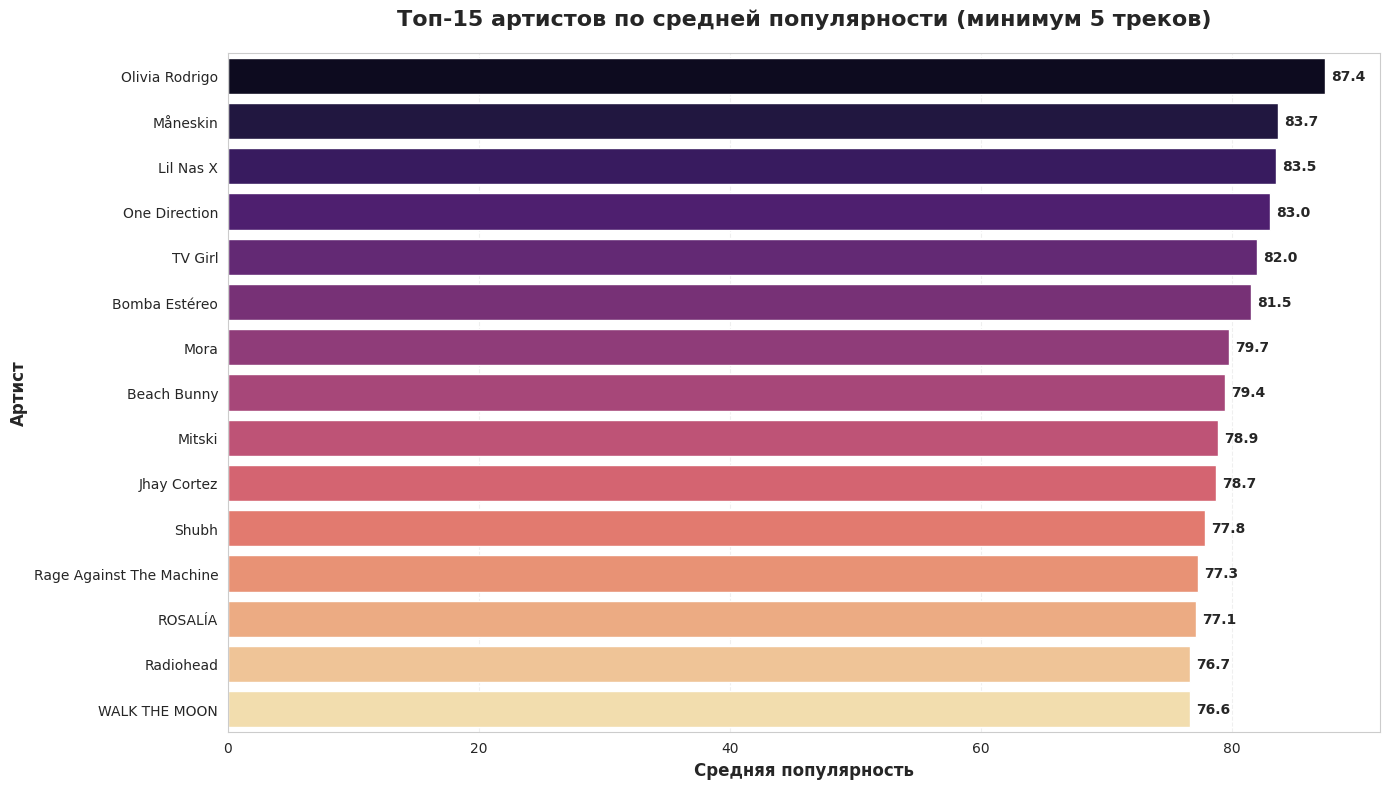

In [11]:
# Визуализация топ-15 артистов по средней популярности
top_artists_pop = artist_popularity_filtered.head(15)

plt.figure(figsize=(14, 8))
sns.barplot(x=top_artists_pop['avg_popularity'].values,
            y=top_artists_pop['artist'].values,
            palette='magma')

# Добавляем числа на каждый столбец
for i, value in enumerate(top_artists_pop['avg_popularity'].values):
    plt.text(value + 0.5, i, f'{value:.1f}', va='center', fontweight='bold', fontsize=10)

plt.xlabel('Средняя популярность', fontsize=12, fontweight='bold')
plt.ylabel('Артист', fontsize=12, fontweight='bold')
plt.title('Топ-15 артистов по средней популярности (минимум 5 треков)',
          fontsize=16, fontweight='bold', pad=20)
plt.grid(True, alpha=0.3, linestyle='--', axis='x')
plt.tight_layout()
plt.show()


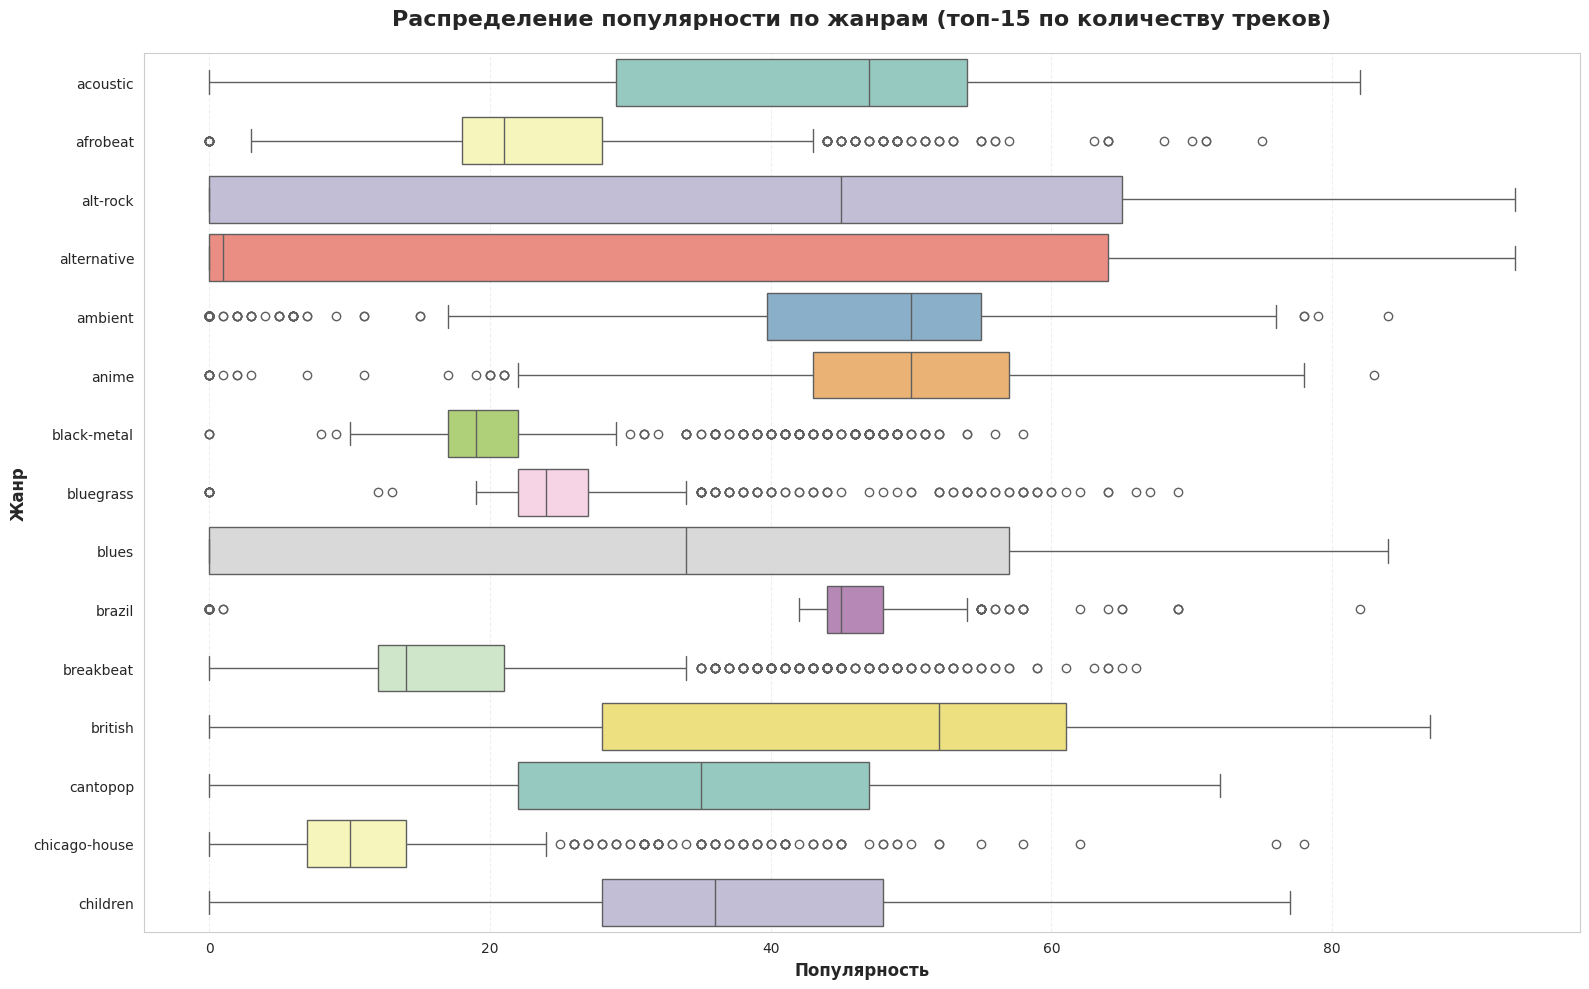

In [12]:
# Визуализация зависимости популярности от жанра (boxplot)
plt.figure(figsize=(16, 10))

# Берем топ-15 жанров по количеству треков для визуализации
top_genres_list = genre_counts.head(15).index.tolist()
df_top_genres = df[df['track_genre'].isin(top_genres_list)]

sns.boxplot(data=df_top_genres, x='popularity', y='track_genre', palette='Set3')
plt.xlabel('Популярность', fontsize=12, fontweight='bold')
plt.ylabel('Жанр', fontsize=12, fontweight='bold')
plt.title('Распределение популярности по жанрам (топ-15 по количеству треков)',
          fontsize=16, fontweight='bold', pad=20)
plt.grid(True, alpha=0.3, linestyle='--', axis='x')
plt.tight_layout()
plt.show()


In [13]:
# Сравнение популярности жанров: среднее значение и разброс
genre_stats = df.groupby('track_genre')['popularity'].agg(['mean', 'std', 'count']).reset_index()
genre_stats.columns = ['genre', 'mean_popularity', 'std_popularity', 'track_count']
genre_stats = genre_stats.sort_values('mean_popularity', ascending=False)

print("="*60)
print("СТАТИСТИКА ПОПУЛЯРНОСТИ ПО ЖАНРАМ")
print("="*60)
print(f"\nТоп-20 жанров по средней популярности:")
print(genre_stats.head(20).to_string(index=False))

print(f"\n\nЖанры с наименьшей средней популярностью:")
print(genre_stats.tail(10).to_string(index=False))


СТАТИСТИКА ПОПУЛЯРНОСТИ ПО ЖАНРАМ

Топ-20 жанров по средней популярности:
            genre  mean_popularity  std_popularity  track_count
         pop-film           59.283       10.249388         1000
            k-pop           56.896       16.946456         1000
            chill           53.651       14.951279         1000
              sad           52.379       11.492756         1000
           grunge           49.594       18.488726         1000
           indian           49.539       11.346595         1000
            anime           48.772       11.811330         1000
              emo           48.128       17.586839         1000
        sertanejo           47.866        3.943551         1000
              pop           47.576       34.040461         1000
progressive-house           46.615       20.188619         1000
            piano           45.273       20.461259         1000
         mandopop           45.025       12.968213         1000
       deep-house           44

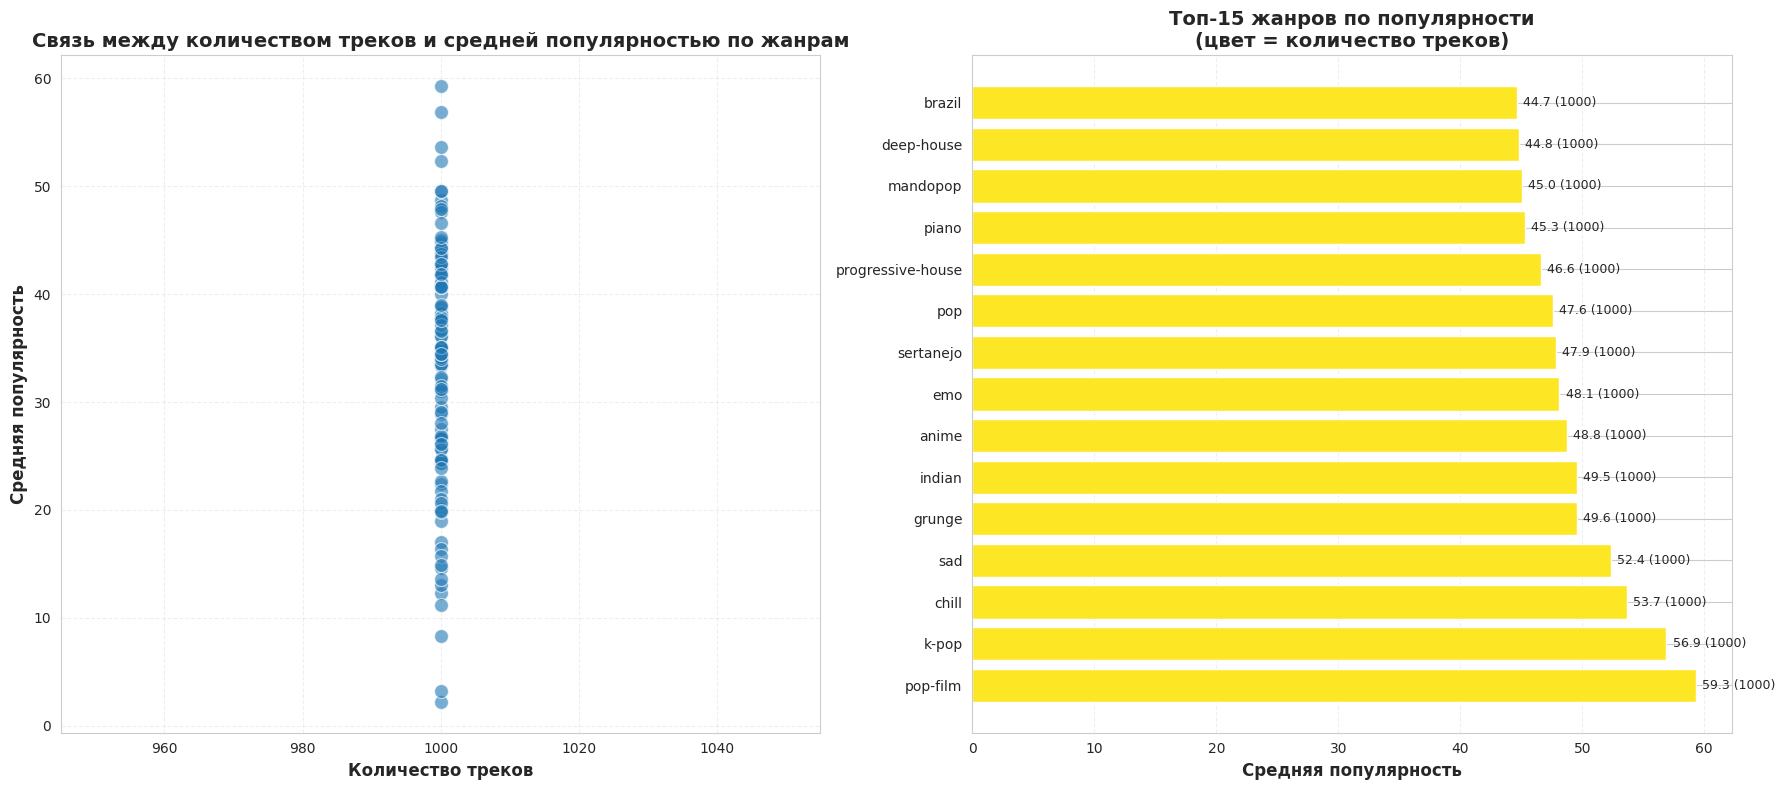

In [14]:
# Визуализация: сравнение количества треков и средней популярности по жанрам
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# График 1: Количество треков vs Средняя популярность
genre_counts_df = genre_counts.reset_index()
genre_counts_df.columns = ['genre', 'count']
genre_combined = pd.merge(
    genre_counts_df,
    genre_stats[['genre', 'mean_popularity']],
    left_on='genre',
    right_on='genre',
    how='inner'
)

sns.scatterplot(data=genre_combined, x='count', y='mean_popularity',
                s=100, alpha=0.6, ax=axes[0])
axes[0].set_xlabel('Количество треков', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Средняя популярность', fontsize=12, fontweight='bold')
axes[0].set_title('Связь между количеством треков и средней популярностью по жанрам',
                  fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3, linestyle='--')

# График 2: Топ-15 жанров по популярности с указанием количества треков
top_15_genres = genre_stats.head(15)
colors = plt.cm.viridis(top_15_genres['track_count'] / top_15_genres['track_count'].max())

bars = axes[1].barh(range(len(top_15_genres)), top_15_genres['mean_popularity'].values, color=colors)
axes[1].set_yticks(range(len(top_15_genres)))
axes[1].set_yticklabels(top_15_genres['genre'].values)
axes[1].set_xlabel('Средняя популярность', fontsize=12, fontweight='bold')
axes[1].set_title('Топ-15 жанров по популярности\n(цвет = количество треков)',
                  fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3, linestyle='--', axis='x')

# Добавляем значения на столбцы
for i, (idx, row) in enumerate(top_15_genres.iterrows()):
    axes[1].text(row['mean_popularity'] + 0.5, i,
                f"{row['mean_popularity']:.1f} ({int(row['track_count'])})",
                va='center', fontsize=9)

plt.tight_layout()
plt.show()


КОРРЕЛЯЦИЯ: КОЛИЧЕСТВО ТРЕКОВ vs ПОПУЛЯРНОСТЬ

Корреляция для артистов (количество треков vs средняя популярность):
   Коэффициент корреляции: -0.0513

Корреляция для жанров (количество треков vs средняя популярность):
   Коэффициент корреляции: nan


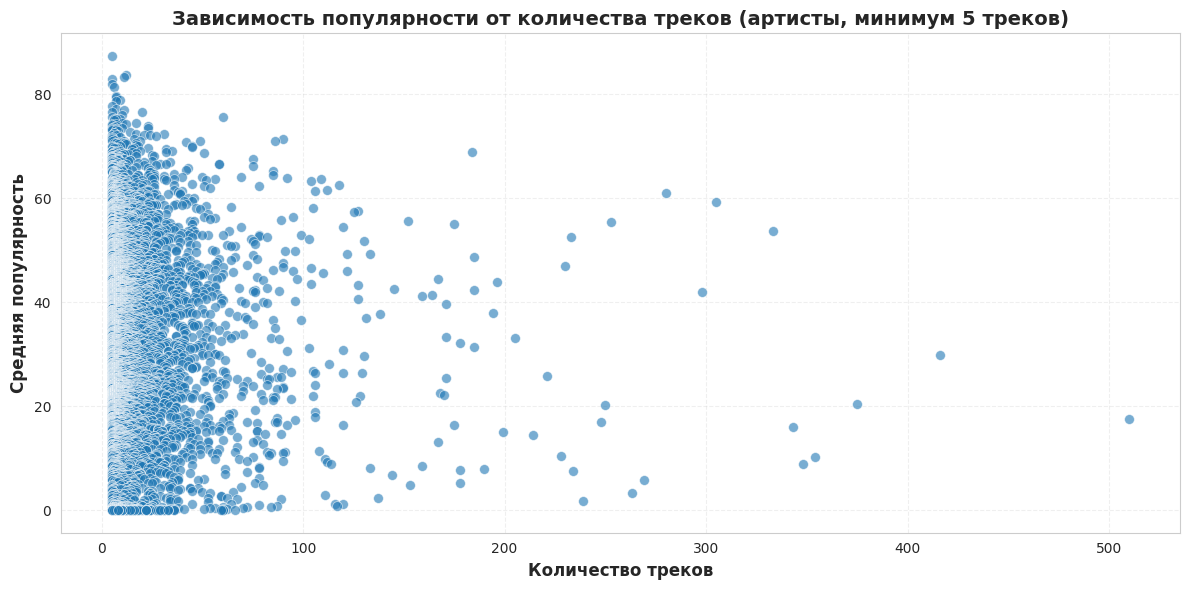

In [15]:
# Анализ: есть ли корреляция между количеством треков артиста и его средней популярностью?
print("="*60)
print("КОРРЕЛЯЦИЯ: КОЛИЧЕСТВО ТРЕКОВ vs ПОПУЛЯРНОСТЬ")
print("="*60)

# Для артистов
correlation_artists = artist_popularity_filtered[['track_count', 'avg_popularity']].corr()
print(f"\nКорреляция для артистов (количество треков vs средняя популярность):")
print(f"   Коэффициент корреляции: {correlation_artists.iloc[0, 1]:.4f}")

# Для жанров
correlation_genres = genre_combined[['count', 'mean_popularity']].corr()
print(f"\nКорреляция для жанров (количество треков vs средняя популярность):")
print(f"   Коэффициент корреляции: {correlation_genres.iloc[0, 1]:.4f}")

# Визуализация корреляции для артистов
plt.figure(figsize=(12, 6))
sns.scatterplot(data=artist_popularity_filtered, x='track_count', y='avg_popularity',
                alpha=0.6, s=50)
plt.xlabel('Количество треков', fontsize=12, fontweight='bold')
plt.ylabel('Средняя популярность', fontsize=12, fontweight='bold')
plt.title('Зависимость популярности от количества треков (артисты, минимум 5 треков)',
          fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()


### Микровывод по корреляционному анализу:

**Результаты корреляции**:
- **Артисты**: Коэффициент корреляции = -0.0513 (очень слабая отрицательная связь)
- **Жанры**: Корреляция = NaN (невозможно вычислить, т.к. все жанры имеют одинаковое количество треков ~1000)

**Что показывает график scatter plot**:
- **10к точек в начале (слева)**: Много артистов с малым количеством треков (1-10), точки накладываются друг на друга - это "длинный хвост" распределения
- **Разброс увеличивается при росте x**: Чем больше треков у артиста, тем больше разброс популярности. Артисты с 50+ треками могут быть как очень популярными (80+), так и непопулярными (20-30)
- **Точек меньше справа**: Мало артистов с большим количеством треков - это редкие случаи

**Главный вывод**: 
Количество треков у артиста **НЕ предсказывает** его популярность. Корреляция практически отсутствует (-0.05). Это означает, что продуктивность артиста (количество релизов) и его средняя популярность - независимые факторы.

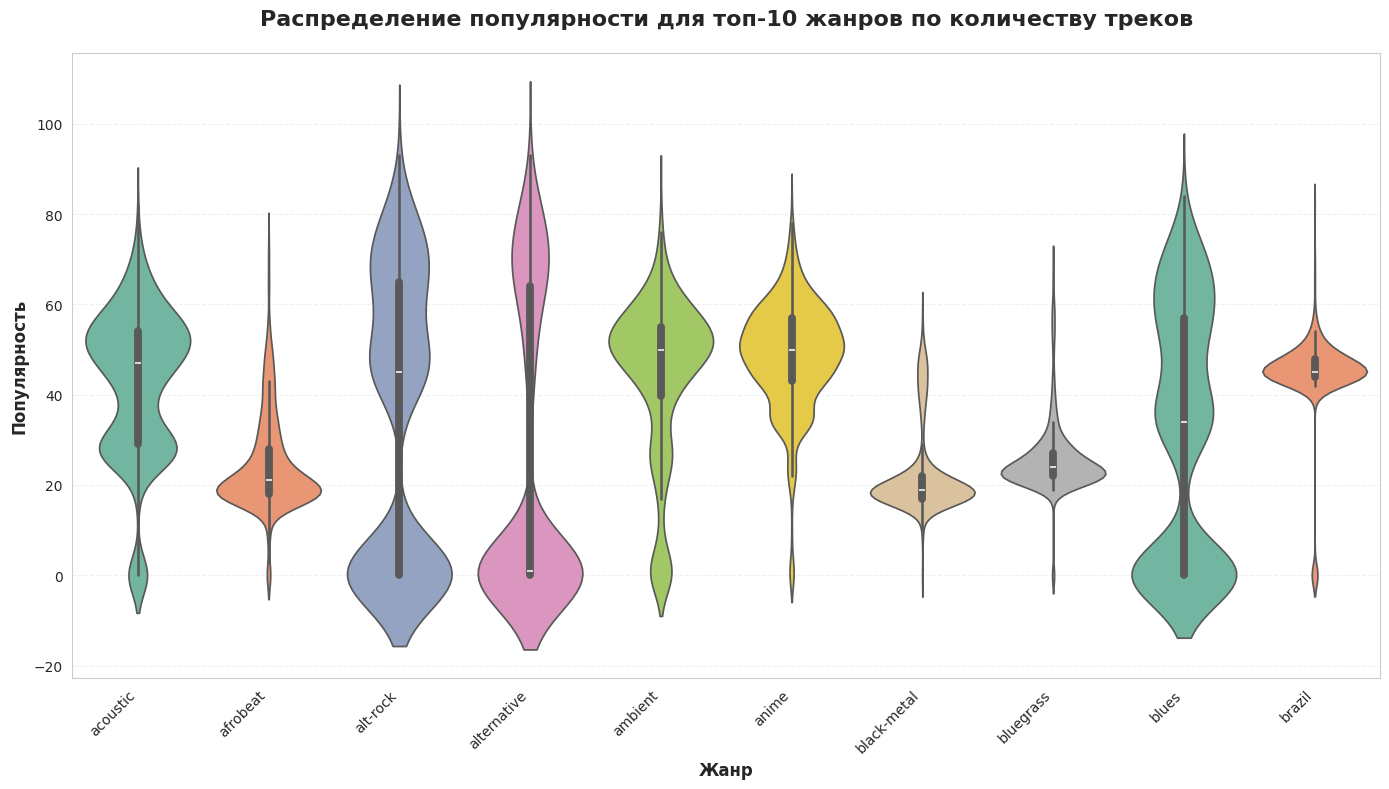

In [16]:
# Дополнительный анализ: распределение популярности для топ-10 жанров
top_10_genres = genre_counts.head(10).index.tolist()
df_top_10 = df[df['track_genre'].isin(top_10_genres)]

plt.figure(figsize=(14, 8))
sns.violinplot(data=df_top_10, x='track_genre', y='popularity', palette='Set2')
plt.xlabel('Жанр', fontsize=12, fontweight='bold')
plt.ylabel('Популярность', fontsize=12, fontweight='bold')
plt.title('Распределение популярности для топ-10 жанров по количеству треков',
          fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, linestyle='--', axis='y')
plt.tight_layout()
plt.show()


### Выводы по Задаче 3:

**Что обнаружили**:

1. **Распределение по жанрам**:
   - Датасет содержит 114 уникальных жанров
   - Распределение треков по жанрам относительно равномерное (около 1000 треков на жанр)
   - Это говорит о хорошо сбалансированном датасете

2. **Распределение по артистам**:
   - В датасете очень много уникальных артистов (десятки тысяч)
   - Распределение сильно неравномерное: большинство артистов имеют 1-2 трека
   - Есть артисты с большим количеством треков (топ-15 имеют от 50+ треков)
   - Это типично для музыкальных датасетов - "длинный хвост" распределения

3. **Влияние на популярность**:
   - **Жанры**: Существуют значительные различия в средней популярности между жанрами
   - **Артисты**: Артисты с большим количеством треков не обязательно имеют высокую среднюю популярность
   - Корреляция между количеством треков и популярностью слабая или отсутствует

4. **Наиболее популярные категории**:
   - Определены топ-15 жанров по средней популярности
   - Определены топ-15 артистов по средней популярности (с фильтром минимум 5 треков)

**Что это значит**:

- **Для feature engineering**:
  - Жанр может быть важным признаком для модели
  - Артист как признак может быть менее полезен из-за большого количества уникальных значений
  - Можно создать бинарные признаки для топ-N жанров/артистов
  - Можно использовать target encoding для жанров

- **Для моделирования**:
  - Категориальные признаки (жанр, артист) требуют специальной обработки (one-hot encoding, target encoding)
  - Жанр имеет более сильное влияние на популярность, чем артист
  - Стоит рассмотреть создание признаков типа "топ-жанр", "топ-артист"

**Следующие шаги**:
- Корреляционный анализ числовых признаков с целевой переменной
- Визуализация взаимосвязей между признаками
